# FACIAL EMOTION CLASSIFICATION

# Step 1: Problem Identification and Description


# Step - 2 Data Collection

## For scraping images to create our dataset we have used 2 sources -
1. Google Image search
2. Instagram

Google image seach was built using chromedriver and follows these steps -
1. Open chrome window
2. Search google images with the provided query string
3. Click on each image in the results
4. Get the link for the the images
5. After all links are collected for a query, the images are downloaded and saved

Instagram hastag approach followed these steps -
1. InstaBot opens the automated chrome window
2. Inputs the hahshtag into the search field and selects the matching suggestion
3. Goes through the images and simultaneously the Yolo algorithm predicts the label of the picture (pretrained Yolov3 model is used to identify image with human beings and discard other images)
4. Save/download the images classified as person in the respective emotion category folder

#### Scraping data from google images

In [7]:
import selenium
from selenium import webdriver
import time
import requests
import os
from PIL import Image
import io
import hashlib
import cv2

In [29]:
def fetch_image_urls(query:str, max_links_to_fetch:int, wd:webdriver, sleep_between_interactions:int=1):
    def scroll_to_end(wd):
        wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(sleep_between_interactions)    
    
    # build the google query
    search_url = "https://www.google.com/search?safe=off&site=&tbm=isch&source=hp&q={q}&oq={q}&gs_l=img"

    # load the page
    wd.get(search_url.format(q=query))

    image_urls = set()
    image_count = 0
    results_start = 0
    while image_count < max_links_to_fetch:
        scroll_to_end(wd)

        # get all image thumbnail results
        thumbnail_results = wd.find_elements_by_css_selector("img.Q4LuWd")
        number_results = len(thumbnail_results)
             
        for img in thumbnail_results[results_start:number_results]:
            # try to click every thumbnail such that we can get the real image behind it
            try:
                img.click()
                time.sleep(sleep_between_interactions)
            except Exception:
                continue

            # extract image urls    
            actual_images = wd.find_elements_by_css_selector('img.n3VNCb')
            for actual_image in actual_images:
                if actual_image.get_attribute('src') and 'http' in actual_image.get_attribute('src'):
                    image_urls.add(actual_image.get_attribute('src'))

            image_count = len(image_urls)

            if len(image_urls) >= max_links_to_fetch:
                break
        else:
            time.sleep(30)
            return
            load_more_button = wd.find_element_by_css_selector(".mye4qd")
            if load_more_button:
                wd.execute_script("document.querySelector('.mye4qd').click();")

        # move the result startpoint further down
        results_start = len(thumbnail_results)

    return image_urls

In [30]:
def download_image(folder_path:str,file_name:str,url:str):
    try:
        image_content = requests.get(url).content

    except Exception as e:
        pass

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        folder_path = os.path.join(folder_path,file_name)
        if os.path.exists(folder_path):
            file_path = os.path.join(folder_path,hashlib.sha1(image_content).hexdigest()[:10] + '.jpg')
        else:
            os.mkdir(folder_path)
            file_path = os.path.join(folder_path,hashlib.sha1(image_content).hexdigest()[:10] + '.jpg')
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
    except Exception as e:
        pass

#### Chromedriver
- chromedriver.exe is used to open a chrome browser window before we can start scraping data.
- The proper chrome driver can be download from : https://chromedriver.chromium.org/downloads
- We have included the chromedriver for windows with our repository

In [11]:
# Setting the path for chrome driver
CHROME_DRIVER_PATH = os.path.abspath('./') + "\chromedriver.exe"

#### Downloading images for category : "happy"

In [37]:
%%capture
queries = ["happy human face", "happy black man face", "happy white man face", "happy black woman face", "happy white woman face", "happy asian face", "happy indian man face", "happy indian woman face"]
for query in queries:
    wd = webdriver.Chrome(executable_path=CHROME_DRIVER_PATH)
    wd.get('https://google.com')
    search_box = wd.find_element_by_css_selector('input.gLFyf')
    search_box.send_keys(query)
    links = fetch_image_urls(query,100,wd)
    images_path = os.path.abspath('./') + '/downloaded_data'
    if not os.path.exists(images_path):
        os.mkdir(images_path)
    for i in links:
        download_image(images_path,query,i)
    wd.quit()

#### Downloading images for category : "sad"

In [35]:
%%capture
queries = ["sad human face", "sad black man face", "sad white man face", "sad black woman face", "sad white woman face", "sad asian face", "sad indian man face", "sad indian woman face"]
for query in queries:
    wd = webdriver.Chrome(executable_path=CHROME_DRIVER_PATH)
    wd.get('https://google.com')
    search_box = wd.find_element_by_css_selector('input.gLFyf')
    search_box.send_keys(query)
    links = fetch_image_urls(query,100,wd)
    images_path = os.path.abspath('./') + '/downloaded_data'
    if not os.path.exists(images_path):
        os.mkdir(images_path)
    for i in links:
        download_image(images_path,query,i)
    wd.quit()

#### Downloading images for category : "angry"

In [23]:
%%capture
queries = ["angry human face", "angry black man face", "angry white man face", "angry black woman face", "angry white woman face", "angry asian face", "angry indian man face", "angry indian woman face"]
for query in queries:
    wd = webdriver.Chrome(executable_path=CHROME_DRIVER_PATH)
    wd.get('https://google.com')
    search_box = wd.find_element_by_css_selector('input.gLFyf')
    search_box.send_keys(query)
    links = fetch_image_urls(query,100,wd)
    images_path = os.path.abspath('./') + '/downloaded_data'
    for i in links:
        download_image(images_path,query,i)
    wd.quit()

#### Downloading images for category : "disgusted"

In [24]:
%%capture
queries = ["disgusted human face", "disgusted black man face", "disgusted white man face", "disgusted black woman face", "disgusted white woman face", "disgusted asian face", "disgusted indian man face", "disgusted indian woman face"]
for query in queries:
    wd = webdriver.Chrome(executable_path=CHROME_DRIVER_PATH)
    wd.get('https://google.com')
    search_box = wd.find_element_by_css_selector('input.gLFyf')
    search_box.send_keys(query)
    links = fetch_image_urls(query,100,wd)
    images_path = os.path.abspath('./') + '/downloaded_data'
    if not os.path.exists(images_path):
        os.mkdir(images_path)
    for i in links:
        download_image(images_path,query,i)
    wd.quit()

#### Downloading images for category : "surprised"

In [25]:
%%capture
queries = ["surprised black man face", "surprised white man face", "surprised black woman face", "surprised white woman face", "surprised indian man face", "surprised indian woman face", "surprised human face","surprised asian face"]
for query in queries:
    wd = webdriver.Chrome(executable_path=CHROME_DRIVER_PATH)
    wd.get('https://google.com')
    search_box = wd.find_element_by_css_selector('input.gLFyf')
    search_box.send_keys(query)
    links = fetch_image_urls(query,100,wd)
    images_path = os.path.abspath('./') + '/downloaded_data'
    if not os.path.exists(images_path):
        os.mkdir(images_path)
    for i in links:
        download_image(images_path,query,i)
    wd.quit()

#### Scraping data from instagram

In [50]:
%%capture
!pip install mxnet gluoncv

In [2]:
%%capture
import mxnet as mx
from gluoncv import model_zoo, data, utils

##### YoloV3 algorithm used to ensure that the download images are that of human (label corresponding to person in YoloV3) and not anything else

In [3]:
%%capture
class YoloV3:
    def __init__(self):
        """Yolo V3 pretrained model
           VOC dataset: aeroplane, bicycle, bird, boat, bottle, bus, car, cat, chair, cow, diningtable, dog, horse, motorbike, person, pottedplant, sheep, sofa, train, tvmonitor
        """
        self.net = model_zoo.get_model('yolo3_darknet53_voc', pretrained=True)

    @staticmethod
    def preprocess(image):
        """Load and transform the image
        """
        return data.transforms.presets.yolo.transform_test(mx.ndarray.array(image), short=512)

    def get_object_labels(self, class_ids, scores, score_th=0.5):
        """Filter detections by score and obtain the corresponding label for each class
        """
        class_ids = class_ids[0].asnumpy().reshape(1, -1)
        scores = scores[0].asnumpy().reshape(1, -1)
        selected_class_ids = class_ids[scores > score_th]
        return [self.net.classes[int(class_id)] for class_id in selected_class_ids]

    def detect_objects(self, image):
        """Object detection in an image
        """
        x, img = self.preprocess(image)
        class_ids, scores, bboxs = self.net(x)
        return class_ids, scores, bboxs

    def __call__(self, *args, **kwargs):
        """1. Detect objects
           2. Get object labels. For this task we are only interested in what elements are in the image, we don't need more information
        """
        image = kwargs.get('image')
        class_ids, scores, _ = self.detect_objects(image)
        labels = self.get_object_labels(class_ids, scores)
        return labels

In [53]:
%%capture
!pip install webdriver_manager.chrome selenium

In [4]:
%%capture
import os
import time
import logging
import requests
from io import BytesIO
from webdriver_manager.chrome import ChromeDriverManager
import argparse
from PIL import Image
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup as bs

##### Initialize InstaBot to do automated search and download of images accrording to emotion category and hashtags

In [18]:
%%capture
class InstaBot:
    def __init__(self, emotion,hashtag, **kwargs):
        self.user = '_test_63_' #'Enter username for instagram'
        self.password = 'BerHatIPundOngRiUNan879%$' #'Enter password for instagram'
        self.path_out = os.path.abspath('./') + '/downloaded_data'
        self.emotion = emotion
        self.hashtag = hashtag

        chrome_options = webdriver.ChromeOptions()
        chrome_options.add_argument('--incognito')
#         self.driver = webdriver.Chrome(chrome_options=chrome_options)
        self.driver = webdriver.Chrome(executable_path=CHROME_DRIVER_PATH)
        self.yolov3 = YoloV3()

    @staticmethod
    def get_image(url_image):
        """Download image from url image
        """
        image_data = requests.get(url_image)
        image_data_content = image_data.content
        return Image.open(BytesIO(image_data_content))

    def save_image(self, image, label):
        """Save image in the folder indicated by the label
        """
        out_folder_path = os.path.join(self.path_out, self.emotion)
        os.makedirs(out_folder_path, exist_ok=True)
        out_image_path = os.path.join(out_folder_path, '{}.jpg'.format(str(time.time())))
        image.save(out_image_path)

    def labels_in_image(self, image):
        """Get object labels in the image using Yolo V3
        """
        return list(set(self.yolov3(image=image)))

    def get_data_images(self):
        """Get data images from html.
        """
        html_to_parse = str(self.driver.page_source)
        html = bs(html_to_parse, 'html.parser')
        return html.findAll('img', {'class': 'FFVAD'})

    def download_images(self):
        """Main process to find, filter and download the images.
           Obtaining the images by scrolling and using the YoloV3 to check if it includes what we are looking for.
        """
        downloaded_images = []
        r_scroll_h = 'return document.body.scrollHeight'
        scroll_h = 'window.scrollTo(0, document.body.scrollHeight);'

        lh = self.driver.execute_script(r_scroll_h)
        while True:
            self.driver.execute_script(scroll_h)
            self.driver.implicitly_wait(1)
            nh = self.driver.execute_script(r_scroll_h)

            if nh == lh:
                self.driver.execute_script(scroll_h)
                continue
            else:
                lh = nh
                self.driver.implicitly_wait(1)

            all_images_data = self.get_data_images()
            non_downloaded_images = list(set(all_images_data) - set(downloaded_images))
            for image_data in non_downloaded_images:
                try:
                    image = self.get_image(image_data.attrs['src'])
                    labels = self.labels_in_image(image)
                    for label in labels:
                        #download only those pictures that the Yolo model 
                        #suggest are images of a person
                        #ignore other images
                        if label in ['person']:
                            self.save_image(image, label)
                            downloaded_images.append(image_data)
                except Exception:
                    logging.warning('Error downloading an image')
            
            self.driver.quit()
            
            
    def __call__(self, *args, **kwargs):
        self.driver.get('https://instagram.com')
        self.driver.implicitly_wait(2)

        self.driver.find_element_by_xpath('//input[@name=\"username\"]').send_keys(self.user)
        self.driver.find_element_by_xpath('//input[@name=\"password\"]').send_keys(self.password)
        self.driver.find_element_by_xpath('//button[@type=\"submit\"]').click()
        self.driver.implicitly_wait(4)

        self.driver.find_element_by_xpath('//button[contains(text(), "Not Now")]').click()
        self.driver.implicitly_wait(4)

        self.driver.find_element_by_xpath('//input[@type=\"text\"]').send_keys(self.hashtag)
        time.sleep(3)
        for _ in range(2):
            self.driver.find_element_by_xpath('//input[@type=\"text\"]').send_keys(Keys.ENTER)

        self.download_images()
        
        self.driver.quit()

#### Setting up the hashtags for the search on instagram for every emotion category

In [15]:
# emotion_categories = {"angry":hashtag_angry,"disgusted":hashtag_disgusted,"happy":hashtag_happy,"sad":hashtag_sad,"surprised":hashtag_surprised}
hashtag_angry = ["#angryface","#angrymanface","#angrywomanface","#angryselfie"]
hashtag_disgusted = ["#disgustedselfie","#disgustedface","#disgustedmanface","#disgustedwomanface"]
hashtag_happy = ["#happyface","#happypeople","#happyselfie","#happyman","#happywoman","#happyfaceselfie","#happymanselfie","#happywomanselfie"]
hashtag_sad = ["#sadselfie","#sadhumanface","#sadwomanface","#sadface","#sadpic"]
hashtag_surprised = ["#surprisedman","#surprisedwoman","#surprisedpeople","#surprisedselfie","#surprisedface","#surprisedpic"]

##### The images are downloaded in separate cells to tackle the interrupt/failed to connect issue that arises if the chromedriver is overloaded with request 

#### Downloading images for category : "angry"

In [25]:
%%capture
#emotion - angry
for i in hashtag_angry:
    bot = InstaBot("angry",i)
    bot()

#### Downloading images for category : "disgusted"

In [20]:
%%capture
# #emotion - disgusted
for i in hashtag_disgusted:
    bot = InstaBot("disgusted",i)
    bot()

#### Downloading images for category : "happy"

In [21]:
%%capture
#emotion - happy
for i in hashtag_happy:
    bot = InstaBot("happy",i)
    bot()

#### Downloading images for category : "sad"

In [22]:
%%capture
#emotion - sad
for i in hashtag_sad:
    bot = InstaBot("sad",i)
    bot()

#### Downloading images for category : "surprised"

In [23]:
%%capture
#emotion - surprised
for i in hashtag_surprised:
    bot = InstaBot("surprised",i)
    bot()

# Step 3: Data exploration

In [54]:
import cv2
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [64]:
downloaded_data_path = os.path.abspath('./') + '/downloaded_data'

## Visualizations of original downloaded data

### happy

In [65]:
happy_path = downloaded_data_path + "/happy"

In [66]:
happy_count  = len(os.listdir(happy_path))
print("Number of images for happy face : ",happy_count)

Number of images for happy face :  2800


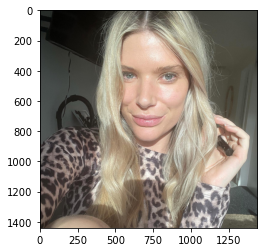

In [69]:
random_file_path = happy_path + "/" + random.choice(os.listdir(happy_path))
plt.imshow(mpimg.imread(random_file_path))

### sad

In [71]:
sad_path = downloaded_data_path + "/sad"

In [72]:
sad_count  = len(os.listdir(sad_path))
print("Number of images for sad face : ",sad_count)

Number of images for sad face :  2180


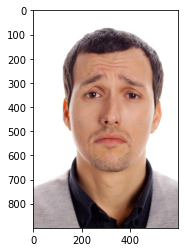

In [83]:
random_file_path = sad_path + "/" + random.choice(os.listdir(sad_path))
plt.imshow(mpimg.imread(random_file_path))

### angry

In [85]:
angry_path = downloaded_data_path + "/angry"

In [86]:
angry_count  = len(os.listdir(angry_path))
print("Number of images for angry face : ",angry_count)

Number of images for angry face :  1131


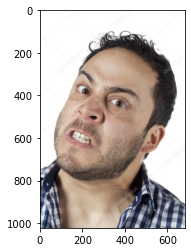

In [103]:
random_file_path = angry_path + "/" + random.choice(os.listdir(angry_path))
plt.imshow(mpimg.imread(random_file_path))

### surprised

In [104]:
surprised_path = downloaded_data_path + "/surprised"

In [106]:
surprised_count  = len(os.listdir(surprised_path))
print("Number of images for surprised face : ",surprised_count)

Number of images for surprised face :  783


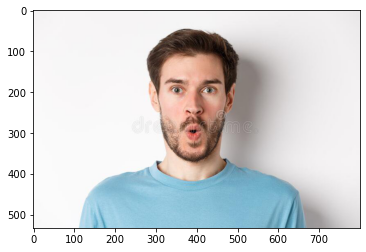

In [110]:
random_file_path = surprised_path + "/" + random.choice(os.listdir(surprised_path))
plt.imshow(mpimg.imread(random_file_path))

### disgusted

In [112]:
disgusted_path = downloaded_data_path + "/disgusted"

In [113]:
disgusted_count  = len(os.listdir(disgusted_path))
print("Number of images for disgusted face : ",disgusted_count)

Number of images for disgusted face :  959


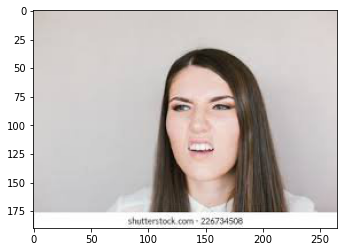

In [133]:
random_file_path = disgusted_path + "/" + random.choice(os.listdir(disgusted_path))
plt.imshow(mpimg.imread(random_file_path))

## Step 4: Pre-processing

### Cropping and face centering image data

- The images downlaod from instagram and google images had a background apart from the face.
- For training we only need the facial data
- So, we used a pre-trained deeplearning network MTCNN to detect faces in the data and cropped out the faces 

In [45]:
import cv2
import sys
import os
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN

In [13]:
class FaceCropper(object):

    def __init__(self):
        self.detector = MTCNN()
    
    def generate(self, image_path,prefix,output_path):
        img = cv2.imread(image_path)
        if (img is None):
            return 0
        faces = self.detector.detect_faces(img)
        for i, face in enumerate(faces): # iterate through all the faces found
            box=face['box']
            if box !=[]:
                confidence = face['confidence']
                if(confidence < 0.9):
                    continue
                # return all faces found in the image
                box[0]= 0 if box[0]<0 else box[0]
                box[1]= 0 if box[1]<0 else box[1]
                
                cropped_img=img[box[1]: box[1]+box[3],box[0]: box[0]+ box[2]]
                try:
                    cv2.imwrite(output_data_path + prefix, cropped_img)
                except Exception as e:
                    pass

In [5]:
%%capture
detecter = FaceCropper()
categories = ["happy", "sad", "angry", "disgusted","surprised"]
data_folder = "/downloaded_data/"
for category in categories:
    input_data_path = os.path.abspath('./') + data_folder + category
    output_data_path = os.path.abspath('./') + "/final_data"

    if not os.path.exists(output_data_path):
        os.mkdir(output_data_path)
    output_data_path = output_data_path + "/" + category + "/"
    if not os.path.exists(output_data_path):
        os.mkdir(output_data_path)
    for filename in os.listdir(input_data_path):
        image_path = input_data_path + "/" + filename
        detecter.generate(image_path,filename,output_data_path)

### Rename data files

- We renamed the data files to ease the process of label creation.
- The files were renamed in the following method -- category_1, category_2 ..
- For examples - happy_0, happy_1 ...

In [1]:
import os

In [2]:
def rename_files(data_path,prefix):
    for count, f in enumerate(os.listdir(data_path)):
        f_name, f_ext = os.path.splitext(f)
        f_name = prefix + "_" +str(count)
 
        new_name = f'{f_name}{f_ext}'
        os.rename(data_path + f, data_path + new_name)

In [3]:
categories = ["sad", "happy", "surprised", "angry", "disgusted"]
for category in categories:
    data_folder = category
    data_path = os.path.abspath('./') + "/" + "/final_data/" + data_folder + "/"
    rename_files(data_path,data_folder)

### Split the data into train and test set
Splitting of data into train and test set in the ratio 70:30.
The data across the 5 categories has been split in stratified manner thus ensuring the same percentage of an emotion category is present in the train and test set as was in the original dataset.

In [1]:
import shutil, random, os
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as T
from torchvision import datasets
import torch.nn as nn
import time
import copy

In [29]:
#the number corresponding to each emotion signify the number of images that needs to be used as test set, caclulated 
#according to percentage of images in a category to the whole images data

stratified_split_numbers = {'angry':240, 'disgusted':224, 'happy':528, 'sad':384, 'surprised':192}

img_folder = os.path.abspath('./') + "/final_data/"
testdestDirectory = os.path.abspath('./')+ "/split_data/" +'/test/'
traindestDirectory = os.path.abspath('./')+ "/split_data/" +'/train/'

for categories in os.listdir(img_folder):
    if categories in stratified_split_numbers:
        files = [file for file in os.listdir(os.path.join(img_folder, categories))]
        random_files = random.sample(files, stratified_split_numbers[categories])
        rem = list(set(files)-set(random_files))
        for fname in random_files:
            srcpath = os.path.join(img_folder, categories, fname)
            tsdestDirectory = os.path.join(testdestDirectory, categories)
            if not os.path.exists(tsdestDirectory):
                os.makedirs(tsdestDirectory)
            tsdestDirectory = os.path.join(testdestDirectory, categories,fname)
            shutil.copyfile(srcpath, tsdestDirectory)
        for name in rem:
            srcpath = os.path.join(img_folder, categories, name)
            trdestDirectory = os.path.join(traindestDirectory, categories)
            if not os.path.exists(trdestDirectory):
                os.makedirs(trdestDirectory)
            trdestDirectory = os.path.join(traindestDirectory, categories,name)
            shutil.copyfile(srcpath, trdestDirectory)

### Create dataloader for the image files

##### Dataset Loader
1. Access the train and test set images, each consisting of a folder ffor every emotion type.
2. Augment the images with random transforms applied to the images to help the model generalize over a variety of image orientations
3. Specify the image dimension and batch size to generate images with specifications accrodingly

In [1]:
import shutil, random, os
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as T
from torchvision import datasets
import torch.nn as nn
from torch.profiler import profile, record_function, ProfilerActivity
import time
import copy

In [2]:
def get_augment_dataset_loader(data_dir, img_size, batch_size,kind):
    if(kind=="train"):
        data_transforms = T.Compose([
                                    T.RandomRotation(30),
                                    T.RandomHorizontalFlip(),
                                    T.Resize(img_size),
                                    T.ToTensor()])
    else:
        data_transforms = T.Compose([T.Resize(img_size),T.ToTensor()])
        
    data = datasets.ImageFolder(data_dir, transform=data_transforms)
    dataloader = torch.utils.data.DataLoader(data,batch_size=batch_size, shuffle=True)
    return dataloader, data

def get_dataset_loader(data_dir, img_size, batch_size,kind):
    if(kind=="train"):
        data_transforms = T.Compose([
                                    T.Resize(img_size),
                                    T.ToTensor()])
    else:
        data_transforms = T.Compose([T.Resize(img_size),T.ToTensor()])
        
    data = datasets.ImageFolder(data_dir, transform=data_transforms)
    dataloader = torch.utils.data.DataLoader(data,batch_size=batch_size, shuffle=True)
    return dataloader, data

In [3]:
train_dir = os.path.abspath('./')+ "/split_data/" +'/train/'
test_dir = os.path.abspath('./')+ "/split_data/" + '/test/'

batch_size = 32
resize = (32,32)

train_data_loader, train_set = get_dataset_loader(train_dir, resize,batch_size,"train")
train_augment_data_loader, train_augment_set = get_augment_dataset_loader(train_dir, resize,batch_size,"train")

test_data_loader, test_set = get_dataset_loader(test_dir, resize,batch_size,"test")

train_data_generator = iter(train_data_loader)
train_augment_data_generator = iter(train_augment_data_loader)
test_data_generator = iter(test_data_loader)

#How to access the images and labels
#train_images,train_labels = next(train_data_generator)
#test_images,test_labels = next(test_data_generator)

### To speed up training loading all data to GPU

In [4]:
train_data = []
train_label = []
for x,y in train_data_loader:
    train_data.append(x)
    train_label.append(y)
for x,y in train_augment_data_loader:
    train_data.append(x)
    train_label.append(y)

train_data = torch.stack(train_data)
train_label = torch.stack(train_label)

In [5]:
test_data = []
test_label = []
for x,y in test_data_loader:
    test_data.append(x)
    test_label.append(y)

test_data = torch.stack(test_data)
test_label = torch.stack(test_label)

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

##### Send to gpu/cpu

In [7]:
train_data = train_data.to(device)
train_label = train_label.to(device)
test_data = test_data.to(device)
test_label = test_label.to(device)

In [8]:
train_data.size()

torch.Size([252, 32, 3, 32, 32])

In [9]:
test_data.size()

torch.Size([49, 32, 3, 32, 32])

In [10]:
train_data_mean = train_data.mean()
train_data_std = train_data.std()

##### Labels
The labels would be in the order in which the folder name of the emotion category appear in the train and test set.<br>
So, angry-0, disgusted-1, happy-2, sad-3, surprised-4

In [6]:
class_names = train_set.classes
print(class_names)

['angry', 'disgusted', 'happy', 'sad', 'surprised']


In [101]:
def imshow_tensor(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    fig = plt.figure(figsize = (30,3))
    plt.imshow(inp)
    plt.tight_layout()
    if title is not None:
        plt.title(title)
    plt.pause(0.001) 

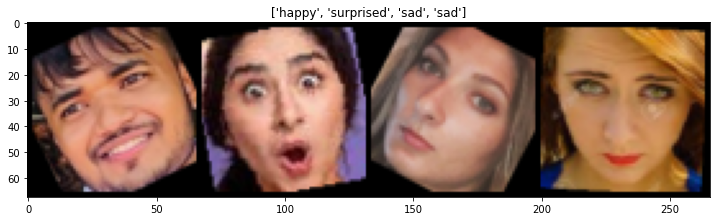

In [110]:
images, classes = next(train_data_generator)
out = torchvision.utils.make_grid(images[0:4])
imshow_tensor(out, title=[class_names[x] for x in classes[0:4]])

## Step 5: Data analysis with deep learning

In [11]:
def get_accuracy(scores, labels):
    num_data = scores.size(0)
    predicted_labels = scores.argmax(dim=1)
    indicator = (predicted_labels == labels)
    num_matches = indicator.sum()
    return 100*num_matches.float()/num_data   

In [12]:
def test_model(model, criterion):
    with torch.no_grad():
        running_loss = 0.0
        running_accuracy = 0
        count = 0
        for inputs, labels in zip(test_data, test_label):
            count+=1
            outputs = model(inputs)
            #_, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
            running_loss += loss.detach()
            running_accuracy += get_accuracy(outputs.detach(),labels)
        test_loss = running_loss/count
        test_acc = running_accuracy/count
        return test_loss, test_acc

In [13]:
def train_model(model, criterion, optimizer, num_epochs=25):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    train_loss = []
    test_loss = []
    for epoch in range(num_epochs):          
        running_loss = 0.0
        running_accuracy = 0
        count = 0
        # Iterate over data.
        for inputs, labels in zip(train_data, train_label):
            count+=1
            # zero the parameter gradients
            optimizer.zero_grad()
            inputs = (inputs - train_data_mean)/train_data_std
            inputs.requires_grad_()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.detach()
            running_accuracy = running_accuracy + get_accuracy(outputs.detach(), labels)
            #scheduler.step()

        epoch_loss = running_loss / count
        epoch_acc = running_accuracy / count
        train_loss.append((epoch, epoch_loss, epoch_acc))
        epoch_test_loss, epoch_test_acc = test_model(model,criterion)
        test_loss.append((epoch, epoch_test_loss, epoch_acc))
        
        if epoch%5==0:
            print('Epoch {}/{}'.format(epoch, num_epochs - 1))
            print('-' * 10)
            print('Train Loss: {:.4f} Acc: {:.4f}'.format(epoch_loss, epoch_acc))
            print('Test Loss: {:.4f} Acc: {:.4f}'.format(epoch_test_loss, epoch_test_acc))
            print()
            
        if epoch_test_acc > best_acc:
            best_acc = epoch_test_acc
            best_model_wts = copy.deepcopy(model.state_dict())
        

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best test Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, train_loss, test_loss

## MLP

In [14]:
class MLP(nn.Module):
    def __init__(self,input_size, output_size):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.layer1 = nn.Linear(input_size,512,bias=True)
        self.layer2 = nn.Linear(512,256,bias=True)
        self.layer3 = nn.Linear(256,128,bias=True)
        self.layer4 = nn.Linear(128,64,bias=True)
        self.layer5 = nn.Linear(64, output_size,bias=True)
    def forward(self,x):
        x = self.flatten(x)
        
        y = self.layer1(x)
        y = torch.relu(y)
        
        y = self.layer2(y)
        y = torch.relu(y)
        
        y = self.layer3(y)
        y = torch.relu(y)
        
        y = self.layer4(y)
        y = torch.relu(y)
        
        y = self.layer5(y)
        
        return y

In [15]:
mlp = MLP(3*32*32, 5)
mlp = mlp.to(device)

In [16]:
criterion = nn.CrossEntropyLoss()
#optimizer = torch.optim.SGD(mlp.parameters(), lr=0.001, momentum=0.9)
optimizer = torch.optim.Adam(mlp.parameters())
#exp_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=1)

In [85]:
best_mlp_model, mlp_train_loss, mlp_test_loss = train_model(mlp, criterion, optimizer, 100)

Epoch 0/99
----------
Train Loss: 1.4393 Acc: 40.0050
Test Loss: 1.5002 Acc: 35.2679

Epoch 5/99
----------
Train Loss: 0.9405 Acc: 62.3636
Test Loss: 1.4206 Acc: 39.9235

Epoch 10/99
----------
Train Loss: 0.5662 Acc: 78.0010
Test Loss: 1.4626 Acc: 42.4745

Epoch 15/99
----------
Train Loss: 0.2935 Acc: 89.3353
Test Loss: 1.9096 Acc: 36.0969

Epoch 20/99
----------
Train Loss: 0.2100 Acc: 92.4355
Test Loss: 1.9988 Acc: 33.9923

Epoch 25/99
----------
Train Loss: 0.1909 Acc: 93.5764
Test Loss: 1.7771 Acc: 38.4566

Epoch 30/99
----------
Train Loss: 0.1322 Acc: 95.4985
Test Loss: 1.8696 Acc: 38.0740

Epoch 35/99
----------
Train Loss: 0.1197 Acc: 95.9821
Test Loss: 1.7828 Acc: 38.2015

Epoch 40/99
----------
Train Loss: 0.0798 Acc: 97.4578
Test Loss: 1.7366 Acc: 40.5612

Epoch 45/99
----------
Train Loss: 0.0810 Acc: 97.3834
Test Loss: 2.3210 Acc: 30.4847

Epoch 50/99
----------
Train Loss: 0.0938 Acc: 96.8750
Test Loss: 1.9826 Acc: 36.7347

Epoch 55/99
----------
Train Loss: 0.0638 Acc

### Profiling our training loop
- Initially we were getting very slow training speeds.
- We used the pytorch profiler to get the gpu and cpu time used by each function in our code
- Our resources -
    - CPU
    - GTX1650 GPU on local PC
    - Tesla K80 on Google Colab

##### Conclusions from profiling our initial training loop
- We discovered that major chunk of the cpu time was being used by the dataloader
- We were using the dataloader initially to dynamically load the data from disk at training time and randomly applying transforms to it to provide the network with a varity of input. Our dataset is quite small with around 4k image in the train set and 1k images in the test set. We were hoping that this method of augmentation would improve our training.
- But this approach led to extremely high training time. The dataloader was responsbile for the 90% of the time spent on t rainig.
- Another thing slowing down the training was the frequest use of .item() function to get the loss and accuracy. .item() function leads to transfer of data from cuda to gpu and thus is a very slow operation. Its use should be avoided within the training loop.

##### Improvents made after profiling the code
- We came up with a workaround to first augment and transform the data and them load all of it to gpu/cpu instead of doing it at the time of training. Since our data was within 200MB, this was feasible. If the dataset was huge and needed GB of space then this would not have been possible.
- We removed the requent use of .to(device), .item() in our code.

Initially for 1 epoch our training time was around 15-16 seconds for MLP. After applying the improvements our training time reduced to 1-2 seconds per epoch.

In [17]:
with profile(
    activities=[ProfilerActivity.CPU, ProfilerActivity.CUDA],
    with_stack=True,
) as prof:
    best_mlp_model, mlp_train_loss, mlp_test_loss = train_model(mlp, criterion, optimizer, 10)

C:\Anaconda\lib\site-packages\torch\autograd\profiler.py:440: UserWarning: CUPTI tracing is not available, falling back to legacy CUDA profiling
  warn("CUPTI tracing is not available, falling back to legacy CUDA profiling")


Epoch 0/9
----------
Train Loss: 1.4474 Acc: 40.2654
Test Loss: 1.4866 Acc: 38.5204

Epoch 5/9
----------
Train Loss: 0.9417 Acc: 62.8100
Test Loss: 1.4377 Acc: 41.9643

Training complete in 0m 48s
Best test Acc: 41.964283


In [18]:
print(prof.key_averages().table(sort_by="cpu_time_total", row_limit=10))

------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                      Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg     Self CUDA   Self CUDA %    CUDA total  CUDA time avg    # of Calls  
------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                  Optimizer.step#Adam.step         4.82%        2.260s        40.33%       18.893s       7.497ms     601.739ms         1.26%       19.868s       7.884ms          2520  
                              aten::linear         2.25%        1.053s        16.81%        7.873s     523.113us     116.013ms         0.24%       11.129s     739.494us         15050  
                           aten::clamp_min         3.48%        1.630s    

From the above profiling data we can see that there is no time involved in loading data. Most of the time is used in matrix multiplications and updating of parameters

## CNN

In [19]:
class CNN(nn.Module):
    def __init__(self,output_size):
        super(CNN, self).__init__()
        # block 1:         3 x 32 x 32 --> 64 x 16 x 16        
        self.conv1a = nn.Conv2d(3,   64,  kernel_size=3, padding=1 )
        self.conv1b = nn.Conv2d(64,  64,  kernel_size=3, padding=1 )
        self.pool1  = nn.MaxPool2d(2,2)
        # block 2:         64 x 16 x 16 --> 128 x 8 x 8
        self.conv2a = nn.Conv2d(64,  128, kernel_size=3, padding=1 )
        self.conv2b = nn.Conv2d(128, 128, kernel_size=3, padding=1 )
        self.pool2  = nn.MaxPool2d(2,2)
        # block 3:         128 x 8 x 8 --> 256 x 4 x 4        
#         self.conv3a = nn.Conv2d(128, 256, kernel_size=3, padding=1 )
#         self.conv3b = nn.Conv2d(256, 256, kernel_size=3, padding=1 )
#         self.pool3  = nn.MaxPool2d(2,2)
        #block 4:          256 x 4 x 4 --> 512 x 2 x 2
#         self.conv4a = nn.Conv2d(256, 512, kernel_size=3, padding=1 )
#         self.pool4  = nn.MaxPool2d(2,2)
        # linear layers:   512 x 2 x 2 --> 2048 --> 4096 --> 4096 --> 5
        self.linear1 = nn.Linear(8192, 4096)
        self.linear2 = nn.Linear(4096,2048)
        self.linear3 = nn.Linear(2048, output_size)

    def forward(self, x):
        # block 1:         3 x 32 x 32 --> 64 x 16 x 16
        x = self.conv1a(x)
        x = torch.relu(x)
        x = self.conv1b(x)
        x = torch.relu(x)
        x = self.pool1(x)
        # block 2:         64 x 16 x 16 --> 128 x 8 x 8
        x = self.conv2a(x)
        x = torch.relu(x)
        x = self.conv2b(x)
        x = torch.relu(x)
        x = self.pool2(x)
#         block 3:         128 x 8 x 8 --> 256 x 4 x 4
#         x = self.conv3a(x)
#         x = torch.relu(x)
#         x = self.conv3b(x)
#         x = torch.relu(x)
#         x = self.pool3(x)
#         #block 4:          256 x 4 x 4 --> 512 x 2 x 2
#         x = self.conv4a(x)
#         x = torch.relu(x)
#         x = self.pool4(x)
        # linear layers:   512 x 2 x 2 --> 2048 --> 4096 --> 4096 --> 10
        x = x.view(-1, 8192)
        x = self.linear1(x)
        x = torch.relu(x)
        x = self.linear2(x)
        x = torch.relu(x)
        x = self.linear3(x) 
        #x=torch.softmax(x,dim=-1)
        
        return x

In [20]:
cnn = CNN(5)
cnn = cnn.to(device)

In [21]:
criterion = nn.CrossEntropyLoss()
#optimizer = torch.optim.SGD(cnn.parameters(), lr=0.01, momentum=0.6)
optimizer = torch.optim.Adam(cnn.parameters())
#exp_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

In [22]:
best_cnn_model, cnn_train_loss, cnn_test_loss = train_model(cnn, criterion, optimizer, 100)

Epoch 0/99
----------
Train Loss: 1.4942 Acc: 35.4663
Test Loss: 1.5244 Acc: 36.2245

Epoch 5/99
----------
Train Loss: 0.7512 Acc: 71.1062
Test Loss: 1.9020 Acc: 41.2628

Epoch 10/99
----------
Train Loss: 0.1813 Acc: 93.9484
Test Loss: 2.3991 Acc: 40.3699

Epoch 15/99
----------
Train Loss: 0.0704 Acc: 97.8423
Test Loss: 4.7049 Acc: 36.4796

Epoch 20/99
----------
Train Loss: 0.0557 Acc: 98.1771
Test Loss: 5.1159 Acc: 33.7372

Epoch 25/99
----------
Train Loss: 0.0457 Acc: 98.4127
Test Loss: 4.8414 Acc: 33.6097

Epoch 30/99
----------
Train Loss: 0.0436 Acc: 98.5119
Test Loss: 4.0894 Acc: 40.1786

Epoch 35/99
----------
Train Loss: 0.0483 Acc: 98.5863
Test Loss: 6.9774 Acc: 37.1811

Epoch 40/99
----------
Train Loss: 0.0524 Acc: 98.2639
Test Loss: 5.6443 Acc: 35.1403

Epoch 45/99
----------
Train Loss: 0.0353 Acc: 98.8095
Test Loss: 10.1637 Acc: 35.3316

Epoch 50/99
----------
Train Loss: 0.0293 Acc: 99.0203
Test Loss: 8.4790 Acc: 37.8827

Epoch 55/99
----------
Train Loss: 0.0351 Ac

## ANN

In [70]:
class ANNNet(nn.Module):
    def __init__(self):
        super(ANNNet, self).__init__()
        self.channel = 3

        self.conv1 = nn.Conv2d(self.channel, 8, kernel_size=5)  # in_channels, out_channels
        self.prelu = nn.PReLU(8)

        self.conv2 = nn.Conv2d(8, 8, kernel_size=1)
        self.pool = nn.MaxPool2d(2, stride=2)  # kernel_size
        self.bn2 = nn.BatchNorm2d(8)
        self.conv_drop = nn.Dropout2d()

        self.conv3 = nn.Conv2d(8, 16, kernel_size=5)
        self.bn3 = nn.BatchNorm2d(16)

        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # in_features, out_features
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 5)

        # Spatial transformer localization-network
        self.localization = nn.Sequential(
            nn.Conv2d(self.channel, 8, kernel_size=7),
            nn.MaxPool2d(2, stride=2),
            nn.ReLU(True),
            nn.Conv2d(8, 16, kernel_size=5),
            nn.MaxPool2d(2, stride=2),
            nn.ReLU(True),
        )

        # Regressor for the 3 * 2 affine matrix
        # Input units: 16 * (((((32 / 2) - 4) / 2) - 2)) ** 2 = 16 * 4 * 4
        #              /    \________________________/
        #          channels     output tensor size
        self.fc_loc = nn.Sequential(
            nn.Linear(16 * 4 * 4, 84),
            nn.ReLU(True),
            nn.Linear(84, 3 * 2),
        )
        # Initialize the weights/bias with identity transformation
        self.fc_loc[2].weight.data.zero_()
        self.fc_loc[2].bias.data.copy_(torch.tensor([1, 0, 0, 0, 1, 0], dtype=torch.float))

    # Spatial transformer network forward function
    def stn(self, x):
        xs = self.localization(x)
        xs = xs.view(-1, 16 * 4 * 4)  # 16 * 4 * 4 refers to self.fc_loc
        theta = self.fc_loc(xs)
        theta = theta.view(-1, 2, 3)

        grid = torch.nn.functional.affine_grid(theta, x.size(), align_corners=False)
        x = torch.nn.functional.grid_sample(x, grid, align_corners=False)
        return x

    def forward(self, x):
        # Transform the input
        x = self.stn(x)

        # Perform the usual forward pass
        x = self.prelu(self.conv1(x))
        
        x = self.prelu(self.bn2(self.conv2(x)))
        x = self.conv_drop(x)
        x = self.pool(x)

        x = torch.relu(self.bn3(self.conv3(x)))
        x = self.conv_drop(x)
        x = self.pool(x)

        # Flatten the output for each image
        x = x.view(-1, 16 * 5 * 5)  # 16 * 5 * 5 refers to self.fc1
        x = torch.relu(self.fc1(x))
        x = torch.nn.functional.dropout(x, training=self.training)
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)

        # Apply log softmax on each image's output
        return x

In [71]:
ann = ANNNet()
ann = ann.to(device)

In [72]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(ann.parameters())

In [74]:
best_ann_model, ann_train_loss, ann_test_loss = train_model(ann, criterion, optimizer, 200)

Epoch 0/199
----------
Train Loss: 1.1768 Acc: 54.1295
Test Loss: 1.3775 Acc: 46.4286

Epoch 5/199
----------
Train Loss: 1.0867 Acc: 57.8869
Test Loss: 1.3999 Acc: 45.4719

Epoch 10/199
----------
Train Loss: 1.0381 Acc: 59.5610
Test Loss: 1.3902 Acc: 47.8316

Epoch 15/199
----------
Train Loss: 0.9932 Acc: 61.5699
Test Loss: 1.4527 Acc: 46.4923

Epoch 20/199
----------
Train Loss: 0.9522 Acc: 63.0952
Test Loss: 1.4863 Acc: 45.2168

Epoch 25/199
----------
Train Loss: 0.9111 Acc: 64.8438
Test Loss: 1.4977 Acc: 45.8546

Epoch 30/199
----------
Train Loss: 0.8666 Acc: 66.8031
Test Loss: 1.5982 Acc: 44.6429

Epoch 35/199
----------
Train Loss: 0.8317 Acc: 67.9315
Test Loss: 1.5982 Acc: 43.1122

Epoch 40/199
----------
Train Loss: 0.8060 Acc: 69.1220
Test Loss: 1.7013 Acc: 43.1122

Epoch 45/199
----------
Train Loss: 0.7695 Acc: 70.8209
Test Loss: 1.6761 Acc: 41.9643

Epoch 50/199
----------
Train Loss: 0.7421 Acc: 71.2550
Test Loss: 1.8287 Acc: 41.5179

Epoch 55/199
----------
Train Loss

In [135]:
def visualize_stn():
    with torch.no_grad():
        # Get a batch of training data
        data = next(iter(test_data_loader))[0].to(device)
        data = data[0:4]
        input_tensor = data.cpu()
        transformed_input_tensor = best_ann_model.stn(data).cpu()

        in_grid = torchvision.utils.make_grid(input_tensor)
        in_grid = in_grid.numpy().transpose((1, 2, 0))
        
        out_grid = torchvision.utils.make_grid(transformed_input_tensor)
        out_grid = out_grid.numpy().transpose((1, 2, 0))
        
        # Plot the results side-by-side
        fig, axarr = plt.subplots(2, 1)
        fig.set_figheight(5)
        fig.set_figwidth(10)
        
        axarr[0].imshow(in_grid)
        plt.tight_layout()
        axarr[0].set_title('Dataset Images')
        
        
        #plt.figure(figsize = (30,3))
        axarr[1].imshow(out_grid)
        plt.tight_layout()
        axarr[1].set_title('Transformed Images')

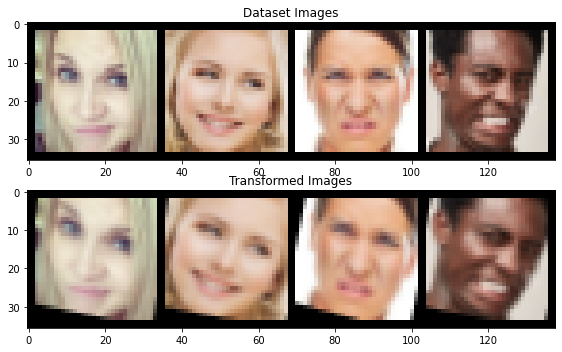

In [136]:
visualize_stn()

## RNN

## Step 6: Numerical results

## Contributions

## References

1. https://medium.com/@wwwanandsuresh/web-scraping-images-from-google-9084545808a2
2. https://gist.github.com/tilfin/98bbba47fdc4ac10c4069cce5fabd834
3. https://github.com/stanford-traffic-sign/stanford-cs230-traffic-sign
4. https://chromedriver.chromium.org/downloads
5. https://www.geeksforgeeks.org/rename-all-file-names-in-your-directory-using-python/
6. https://github.com/dheeraj-sn/facedetect
7. https://towardsdatascience.com/web-scraping-using-selenium-and-yolo-to-build-computer-vision-datasets-73a23d1909d2
8. https://github.com/xbresson/CS5242_2021
9. https://pytorch.org/tutorials/intermediate/spatial_transformer_tutorial.html
10. 